In [1]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import seaborn as sns

import numpyro
import numpyro.infer.kernels as kernels
from numpyro.callbacks import Progbar
from numpyro.distributions import NormalMixture
from numpyro.infer import ELBO, Stein
from numpyro.infer.autoguide import AutoDelta
from numpyro.infer.initialization import init_with_noise, init_to_value

In [2]:
rng_key = jax.random.PRNGKey(42)
num_iterations = 1500

In [3]:
def model():
    numpyro.sample('x', NormalMixture(jnp.array([1/3, 2/3]), 
                                      jnp.array([-2., 2.]), jnp.array([1., 1.])))

In [4]:
guide = AutoDelta(model, init_strategy=init_with_noise(init_to_value(values={'x': -10.}), noise_scale=1.0))
svgd = Stein(model, guide, numpyro.optim.Adagrad(step_size=1.0), ELBO(),
             kernels.RBFKernel(), num_particles=100)
svgd_state = svgd.init(rng_key)

/usr/local/Caskroom/miniconda/base/envs/numpyro-stein/lib/python3.8/site-packages/jax/lax/lax.py:5605: UserWarning: Explicitly requested dtype <class 'numpy.float64'> requested in astype is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  warnings.warn(msg.format(dtype, fun_name , truncated_dtype))


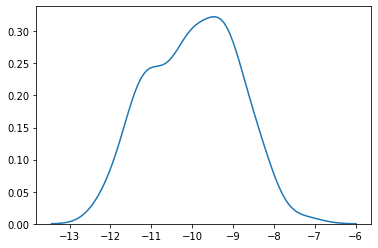

In [5]:
sns.kdeplot(svgd.get_params(svgd_state)['auto_x'])


In [6]:
svgd_state, loss = svgd.train(rng_key, num_iterations, callbacks=[Progbar()])

Stein 2.0227: 100%|██████████| 1500/1500 [00:05<00:00, 281.75it/s]


/usr/local/Caskroom/miniconda/base/envs/numpyro-stein/lib/python3.8/site-packages/jax/lax/lax.py:5605: UserWarning: Explicitly requested dtype <class 'numpy.float64'> requested in astype is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  warnings.warn(msg.format(dtype, fun_name , truncated_dtype))


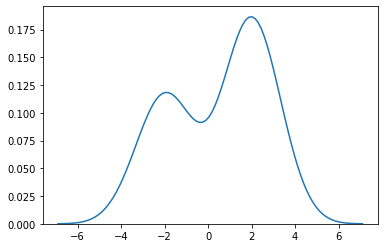

In [7]:
plt.clf()
sns.kdeplot(svgd.get_params(svgd_state)['auto_x'])

In [8]:
svgd.get_params(svgd_state)['auto_x']

DeviceArray([ 0.77923584,  0.50738   ,  1.553287  , -2.914752  ,
             -2.5866036 ,  1.018965  ,  2.7766294 , -3.290557  ,
              2.0446646 ,  1.7452445 ,  2.6506128 ,  2.0486305 ,
              2.4522986 ,  1.6703722 ,  2.2654903 ,  1.911179  ,
             -2.187875  ,  3.7900877 , -1.472575  ,  3.4396436 ,
              1.2966514 ,  0.778179  ,  0.29075608,  2.2731712 ,
             -2.030766  ,  0.30029577,  1.7587285 ,  1.9683971 ,
              1.6049879 , -1.3397954 ,  0.4615214 ,  2.569402  ,
              2.071625  ,  1.419842  , -2.032863  , -3.7006867 ,
              2.7364993 , -1.585217  ,  2.1252875 , -0.6420062 ,
             -1.4863749 ,  1.0764987 , -1.7453403 ,  3.8616922 ,
              3.1125803 , -2.6219053 ,  2.7784274 ,  2.494626  ,
              2.4367495 , -0.6251969 , -0.37200204,  2.4240198 ,
             -2.3525896 ,  3.1622262 , -0.61265683, -2.6660697 ,
              1.852241  , -0.61253744,  3.580493  , -2.0594494 ,
              2.9277823 ,

In [9]:
guide = AutoDelta(model, init_strategy=init_with_noise(init_to_value(values={'x': -10.}), noise_scale=1.0))
svgd = Stein(model, guide, numpyro.optim.Adagrad(step_size=1.0), ELBO(),
             kernels.LinearKernel(), num_particles=100)
svgd_state, loss = svgd.train(rng_key, num_iterations, callbacks=[Progbar()])

Stein 2.3079: 100%|██████████| 1500/1500 [00:01<00:00, 1493.58it/s]


/usr/local/Caskroom/miniconda/base/envs/numpyro-stein/lib/python3.8/site-packages/jax/lax/lax.py:5605: UserWarning: Explicitly requested dtype <class 'numpy.float64'> requested in astype is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  warnings.warn(msg.format(dtype, fun_name , truncated_dtype))


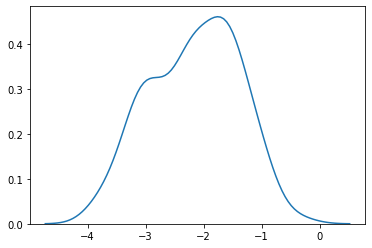

In [10]:
plt.clf()
sns.kdeplot(svgd.get_params(svgd_state)['auto_x'])

In [11]:
guide = AutoDelta(model, init_strategy=init_with_noise(init_to_value(values={'x': -10.}), noise_scale=1.0))
svgd = Stein(model, guide, numpyro.optim.Adagrad(step_size=1.0), ELBO(),
             kernels.RandomFeatureKernel(), num_particles=100)
svgd_state, loss = svgd.train(rng_key, num_iterations * 2, callbacks=[Progbar()])

Stein 2.0427: 100%|██████████| 3000/3000 [00:17<00:00, 167.28it/s]


/usr/local/Caskroom/miniconda/base/envs/numpyro-stein/lib/python3.8/site-packages/jax/lax/lax.py:5605: UserWarning: Explicitly requested dtype <class 'numpy.float64'> requested in astype is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  warnings.warn(msg.format(dtype, fun_name , truncated_dtype))


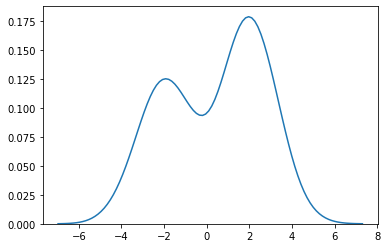

In [12]:
plt.clf()
sns.kdeplot(svgd.get_params(svgd_state)['auto_x'])

In [13]:
guide = AutoDelta(model, init_strategy=init_with_noise(init_to_value(values={'x': -10.}), noise_scale=1.0))
svgd = Stein(model, guide, numpyro.optim.Adagrad(step_size=1.0), ELBO(),
             kernels.IMQKernel(), num_particles=100)
svgd_state, loss = svgd.train(rng_key, num_iterations, callbacks=[Progbar()])

Stein 2.0929: 100%|██████████| 1500/1500 [00:01<00:00, 1085.18it/s]


/usr/local/Caskroom/miniconda/base/envs/numpyro-stein/lib/python3.8/site-packages/jax/lax/lax.py:5605: UserWarning: Explicitly requested dtype <class 'numpy.float64'> requested in astype is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  warnings.warn(msg.format(dtype, fun_name , truncated_dtype))


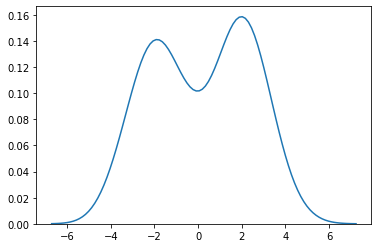

In [14]:
plt.clf()
sns.kdeplot(svgd.get_params(svgd_state)['auto_x'])

In [15]:
guide = AutoDelta(model, init_strategy=init_with_noise(init_to_value(values={'x': -10.}), noise_scale=1.0))
svgd = Stein(model, guide, numpyro.optim.Adagrad(step_size=1.0), ELBO(),
             kernels.MixtureKernel([0.5, 0.5], [kernels.LinearKernel(), kernels.RandomFeatureKernel()]),
             num_particles=100)
svgd_state, loss = svgd.train(rng_key, num_iterations, callbacks=[Progbar()])

Stein 2.2347: 100%|██████████| 1500/1500 [00:10<00:00, 140.91it/s]


/usr/local/Caskroom/miniconda/base/envs/numpyro-stein/lib/python3.8/site-packages/jax/lax/lax.py:5605: UserWarning: Explicitly requested dtype <class 'numpy.float64'> requested in astype is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  warnings.warn(msg.format(dtype, fun_name , truncated_dtype))


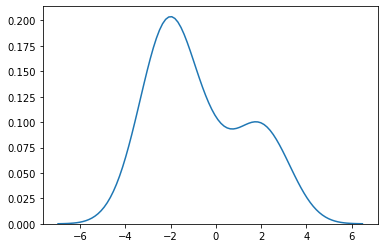

In [16]:
plt.clf()
sns.kdeplot(svgd.get_params(svgd_state)['auto_x'])